In [ ]:
# Import all libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

In [ ]:
# Load mnist dataset
from keras.datasets import mnist
(trainX,trainY),(testX,testY)=mnist.load_data()
# Data Summary
print('Train: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, Y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


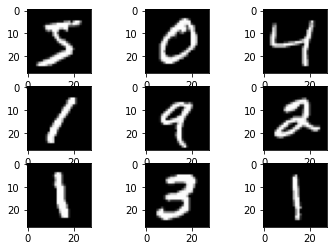

In [ ]:
# Plot first few images
for i in range(9):
	plt.subplot(331 +  i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

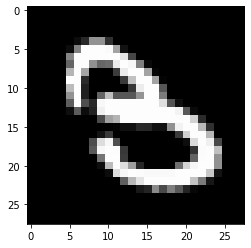

In [ ]:
# Mis-predicted image
plt.imshow(testX[18], cmap=plt.get_cmap('gray'))

In [ ]:
# Reshape data for Conv2D layers
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# Normalise the image array
trainX = trainX.astype('float32')/255.0
testX= testX.astype('float32')/255.0


In [ ]:
# One-hot encode the labels
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
# Define CNN model architecture
model= Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
 # optional_add( kernel_initializer='he_uniform')
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
 # optional_add( kernel_initializer='he_uniform')
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
adam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
model.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.1264 - accuracy: 0.9618
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0423 - accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0252 - accuracy: 0.9918
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0161 - accuracy: 0.9949
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0106 - accuracy: 0.9964
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0087 - accuracy: 0.9972
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0073 - accuracy: 0.9976
Epoch 8/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0052 - accuracy: 0.9983
Epoch 9/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0049 - accuracy: 0.9984
Epoch 10/10
60000/60000 [=============================

In [ ]:
#  Evaluations
test_loss, test_acc = model.evaluate(testX,  testY, verbose=1)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 67us/step
Test accuracy: 0.9884999990463257


In [ ]:
# Make Predictions
predictions = model.predict(testX)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
np.argmax(testY[0])

7

In [ ]:
# Display few reults
for i in range(10,20):
  print('My prediction is: {} and its true value is: {}'.format(np.argmax(predictions[i]),np.argmax(testY[i])))

My prediction is: 0 and its true value is: 0
My prediction is: 6 and its true value is: 6
My prediction is: 9 and its true value is: 9
My prediction is: 0 and its true value is: 0
My prediction is: 1 and its true value is: 1
My prediction is: 5 and its true value is: 5
My prediction is: 9 and its true value is: 9
My prediction is: 7 and its true value is: 7
My prediction is: 5 and its true value is: 3
My prediction is: 4 and its true value is: 4


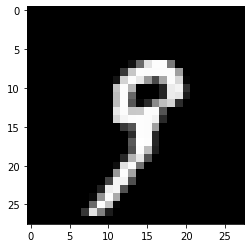

In [ ]:
img=trainX.reshape((trainX.shape[0],28,28))
plt.imshow(img[19], cmap=plt.get_cmap('gray'))

In [ ]:
# Uploading and Pre-processing external images
from google.colab import files
from keras.preprocessing import image
import PIL.ImageOps

uploaded = files.upload()


Saving seven_sim.PNG to seven_sim.PNG


In [ ]:
# Predict external image
for fn in uploaded.keys() :
  path = '/content/' + fn
  img = image.load_img(path, color_mode='grayscale', target_size=(28,28))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  images=images.astype('float32')
  invert_images=1-images
  ext_predictions = model.predict(invert_images)
  print(fn + ' is predicted to be the number {}'.format(np.argmax(ext_predictions)))

seven_sim.PNG is predicted to be the number 1


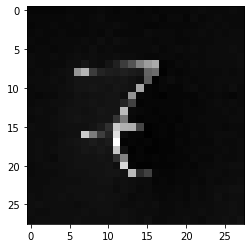

In [ ]:
img1=invert_images.reshape(28,28)
plt.imshow(img1, cmap=plt.get_cmap('gray'))

In [ ]:
x.shape

(1, 28, 28, 1)

In [ ]:
trainX[0].shape

(28, 28, 1)

In [ ]:
images.shape

(1, 28, 28, 1)

In [ ]:
trainX.shape

(60000, 28, 28, 1)